<a href="https://colab.research.google.com/github/antonio-datascience/Projetos-Faculdade/blob/main/Prepara%C3%A7%C3%A3o_e_transforma%C3%A7%C3%A3o_dos_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciência de Dados<br> Aula 1: Preparação e transformação dos dados

Antonio Paulo, pauljr@sempreceub.com<br>
UniCEUB - Centro Universitário de Brasília, Brasil.<br>
https://github.com/antonio-datascience <br>
Copyright: Creative Commons

<hr>

Um dos primeiros passos em Ciência de Dados é a preparação e transformação dos dados, de modo a prepará-los para etapas posteriores.

Nessa aula, vamos considerar dados com elementos duplicados ou faltantes e realizar a sua limpeza. Também vamos considerar métodos básicos de pré-processamento e transformação de dados.

Vamos ler um conjunto de dados com erros:

In [ ]:
# gerador de números aleatórios
import random
random.seed(1) # inicia a semente do gerador de números aleatórios. Importante para reprodução dos resultados
# Pandas is used for data manipulation
import pandas as pd # bibliote Pandas é usada para manipulação de dados
import matplotlib.pyplot as plt # biblioteca para visualização dos dados

# CSV file
data = pd.read_csv('/content/sample_data/california_housing_train.csv', header=(0))
print("Número de linhas e colunas:",data.shape)
data

FileNotFoundError: [Errno 2] No such file or directory: '/content/iris-with-errors.csv'

Primeiramente, vamos remover os "NaN" (not a number, que representam valores desconhecidos) do arquivo, apagando as linhas que contém esse problema. Notem que algumas linhas serão removidas, tais como a 5 e 9.

In [ ]:
# remove as linhas com NaN
data = data.dropna()
print(data.shape)
data.head(25)

Vamos remover as linhas duplicadas. Para isso, inicialmente verificamos se há a ocorrência dessas linhas.

In [ ]:
# Retorna True na posição em que há uma linha duplicada
data.duplicated()

Notem que indicamos nos dados originais, na última coluna, quais linhas estão duplicadas.

Para realizamos a remoção, usamos um método da biblioteca Pandas.

In [ ]:
# Remove as linhas duplicadas
data = data.drop_duplicates()
print(data.shape)
data.head(25)

Compare essa tabela com a original (acima) e verifique se a remoção das linhas foi feita de forma correta. As linhas duplicadas são indicadas na última coluna.

Vamos remover as linhas que contenham "?" ou qualquer outro caracter que indique um erro ou entrada faltante.

Primeiramente, convertemos essas entradas para "NaN":

In [ ]:
import numpy as np
# Substitui Nan por um caracter desejado
data = data.replace('?', np.nan)
data.head(25)

NameError: name 'data' is not defined

A seguir, fazemos a remoção, como anteriormente.

In [ ]:
# Remove as linhas com Nan
data = data.dropna()
print(data.shape)
data.head(25)

Desse forma, temos um conjunto de dados sem erros e entradas duplicadas. É fundamental realizar essas operações em qualquer conjunto de dados antes de aplicarmos os métodos de aprendizado de máquina e estatística.

Podemos também remover determinadas linhas e colunas dos dados. Para remover a segunda e quarta colunas:

In [ ]:
#print("Atributos atuais:",data.columns)
print("Colunas removidas:", data.columns[[1, 3]])
# Remove as linhas especificadas
data = data.drop(data.columns[[1, 3]], axis=1)
data.head(25)

Para remover a primeira e terceira linhas:

In [ ]:
data = data.drop(data.index[[0, 2]], axis=0)
print("Linhas Removidas:", data.index[[0, 2]])
data.head(25)

## Substituição de valores ausentes

Em muitas siutações, a matriz de atributos pode conter valores ausentes. Nesse caso, podemos usar diferentes métodos para substituir tais valores, como preenche-los com valores médios ou medianas.

Vamos ler os dados novamente:

In [ ]:
data = pd.read_csv('/content/iris-with-errors.csv', header=(0))
print(data.shape)
data.head(25)

FileNotFoundError: [Errno 2] No such file or directory: '/content/iris-with-errors.csv'

Vamos substituir os valores com 'NaN' e '?' pelos valores médios dos atributos. Primeiramente, mudamos as entradas '?' para 'NaN', como foi feito anteriormente.

In [ ]:
import numpy as np
data = data.replace('?', np.nan)
data.head(25)

A seguir, inserimos a média de cada atributo nas entradas com valores 'NaN'.

In [ ]:
# convertemos para o formato Numpy e ignoramos a última coluna (classe)
X = np.array(data[data.columns[0:data.shape[1]-1]], dtype = float)
# calculamos a média de cada atributo e armazenamos em um vetor
# Usamos a função nanmean que calcula a média ignorando os Nan
averages = np.nanmean(X, axis = 0) # veja https://docs.scipy.org/doc/numpy/reference/generated/numpy.nanmean.html
for i in np.arange(0, X.shape[0]):
    for j in np.arange(0, X.shape[1]):
        if(np.isnan(X[i,j]) == True): # verificar se é uma entrada com Nan
            X[i,j] = averages[j] # insere a média
print(averages)
print(X)

Assim como inserimos a média, poderíamos inserir a mediana ou qualquer outro valor.

## Normalização e padronização

Vamos ler os dados:

In [ ]:
import pandas as pd
# CSV file
data = pd.read_csv('/content/iris.csv', header=(0))
print(data.shape)
data.head(150)

FileNotFoundError: [Errno 2] No such file or directory: '/content/iris.csv'

Para normalizar os dados no intervalo [0,1]:

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# considera somente os atributos, ignorando a última coluna, que contem a classe
X = np.array(data[data.columns[0:data.shape[1]-1]])
for i  in range(X.shape[1]):
    print("Maior valor da coluna:", i, ":", max(X[:,i]))
    print("Menor Valor da coluna:", i, ":", min(X[:,i]))
# prepara a função para transformar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
# Realiza a normalização e coloca em um novo vetor
X_norm = scaler.fit_transform(X)
print(X_norm)

Ou seja, o máximo e mínimo do novo conjunto de dados:

In [ ]:
print('Mínimo dos atributos:', np.amin(X_norm, axis=0))
print('Máximo dos atributos:', np.amax(X_norm, axis=0))

Para realizarmos a padronização dos dados, de forma que os atributos apresentem média igual a zero e variância igual a 1, o procedimento é parecido.

In [ ]:
from sklearn.preprocessing import StandardScaler
X = np.array(data[data.columns[0:data.shape[1]-1]])
# prepara a função para transformar os dados
scaler = StandardScaler().fit(X)
# realiza a padronização (média=0, variância = 1)
rescaledX = scaler.transform(X)
print(rescaledX)

Vamos verificar se cada coluna apresenta média igual a zero e desvio padrão igual a um.

In [ ]:
for i in np.arange(0,rescaledX.shape[1]):
    print('Media da coluna', i, 'é igual a: ', np.mean(rescaledX[:,i]))
    print('Desvio padrão da coluna', i, 'é igual a: ', np.std(rescaledX[:,i]),'\n')

## Binarização dos dados

A binarização dos dados resulta em valores zero ou um, de acordo com um dado limiar. Ou seja, se o valor em X for maior do que o limiar, o valor resultante será 1, caso contrário será zero.
$$
X_{novo}(i,j) =
\begin{cases} 1, & \mbox{se } X(i,j) \geq T \\ 0, & \mbox{se } X(i,j) < T \end{cases}
$$

In [ ]:
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import MinMaxScaler

# considera apenas os atributos, ignorando a última coluna das classes
X = np.array(data[data.columns[0:data.shape[1]-1]], dtype = float)
T = 0.2 # valor do limiar
print('Limiar:', T)
print('---------------------')

# prepara a normalização dos dados
scaler = MinMaxScaler(feature_range=(0, 1))
# realiza a normalização
X_pad = scaler.fit_transform(X)
# faz a binarização considerando o limiar (threshold)
binarizer = Binarizer(threshold=T).fit(X_pad)
binaryX = binarizer.transform(X_pad)
for i in np.arange(0,X_pad.shape[0]):
    print("Antes:", X_pad[i,])
    print('Depois:',binaryX[i,])
    print('---------------------')

NameError: name 'data' is not defined

## Conversão de variáveis nominais em inteiros

Quando temos dados nominais e ordinais, podemos convertê-los para variáveis numéricas. Vamos fazer isso com as classes dos dados, mudando os valores nominais para inteiros.

In [ ]:
# leitura dos dados
data = pd.read_csv('/content/iris.csv', header=(0))
print('Número de linhas e colunas:', data.shape)
# mostramos a última coluna
print('Coluna com as classes:\n', data[data.columns[-1]])

In [ ]:
# armazena o nome das classes
classes = np.unique(data[data.columns[-1]])
print('Classes:', classes)
number = 0 # valor que será usado para representar a clases
for i in classes:
    data = data.replace(i, number) # substitui cada valor da classe por number
    number = number + 1
print('Novos dados:')
print(data[data.columns[-1]])

In [ ]:
data

Esse mesmo procedimento pode ser usado em qualquer uma das colunas da matriz de atributos.

## One-hot encoding

Quando temos variáveis nominais e precisamos transformá-las para numéricas, uma maneira simples é usar o método one-hot encoding.

In [ ]:
import pandas as pd

# cria um dataframe do Pandas
df = pd.DataFrame({
          'A':['a','b','a', 'c', 'a', 'b'],
        })
df.head()

Usando one-hot enconding, obtemos:

In [ ]:
df = pd.get_dummies(df)
df.head()

Note que foi usado um código binário para cada valor nominal.

## Dados correlacionados

Vamos identificar as colunas em que a correlação entre elas é maior do que $|p|$.

In [ ]:
data = pd.read_csv('/content/BostonHousing.csv', header=(0))
data.head(10)

A matriz de correlação entre as variáveis:

In [ ]:
# obtem a matriz de correlação dos dados
corr = data.corr()
# Mostra a matriz
plt.figure(figsize=(7, 7))
# imshow é usado para mostrar imagens
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
# mostra a barra lateral de cores
plt.colorbar()
# inclui o nome das variáveis
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

In [ ]:
data = data.drop(data.columns[[9]], axis=1)
# obtem a matriz de correlação dos dados
corr = data.corr()
# Mostra a matriz
plt.figure(figsize=(7, 7))
# imshow é usado para mostrar imagens
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
# mostra a barra lateral de cores
plt.colorbar()
# inclui o nome das variáveis
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

Os dados estão armazenados na matriz:

In [ ]:
print(corr)

Assim, para identificarmos as variáveis correlacionadas, usamos um laço for:

In [ ]:
p = 0.7 # correlação mínima
var = []
for i in corr.columns:
    for j in corr.columns:
        if(i != j):
            if np.abs(corr[i][j]) > p: # se maior do que |p|
                var.append([i,j])
print('Variáveis mais correlacionadas:\n', var)

Com isso, podemos remover as variáveis mais correlacionadas de modo a reduzir a redundância nos dados.

## Dados desbalanceados

Muitas vezes, o número de observações difere em cada classe, de modo que os dados são desbalanceados. Podemos verificar o número de elementos em cada classe criando um histograma.

In [ ]:
data = pd.read_csv('/content/Vehicle.csv', header=(0))
data.head(10)

In [ ]:
classes = data[data.columns[-1]]
print(classes)

O histograma do número de elementos em cada classe:

In [ ]:
# armazena os nomes das classes
cl = np.unique(classes)
# armazena o número de elementos em cada classe
ncl = np.zeros(len(cl))
for i in np.arange(0, len(cl)):
    a = classes == cl[i]
    ncl[i] = len(classes[a])
print(ncl)

Em um gráfico de barras:

In [ ]:
# número de classes
numbers = np.arange(0, len(cl))
plt.bar(numbers, ncl,  alpha=.75)
# mostra o nome das classes ao invés dos números
plt.xticks(numbers, cl)
plt.title('Número de elementos em cada classe')
plt.show(True)

Podemos redistribuir os dados de modo que cada classes contenha o mesmo número de elementos.

Vamos balancear os dados de forma que cada classe contenha $N$ elementos. Escolhermos $N$ elementos de forma aleatória, sem reposição, de cada classe.

In [ ]:
N = 3
# classes
cl = np.unique(classes)
X = np.array(data)
Xnew = []
cls = np.array(data[data.columns[-1]])
for i in np.arange(0, len(cl)):
    a = np.argwhere(cls == cl[i])
    # seleciona os índices nos dados de forma aleatória
    inds = np.random.choice(a[:,0],N,replace=False)
    Xnew.append(X[inds,:])
Xnew = np.array(Xnew)
print('Dados obtidos a partir da amostragem')
print(Xnew)

## Outliers - Box plot

Em muitos casos, temos a presença de outliers nos dados. Uma maneira simples de identificar outliers é criando um boxplot.

Lembrem-se, um boxplot:

<img src="https://cdn-images-1.medium.com/max/1600/1*2c21SkzJMf3frPXPAR_gZA.png" style="height:300px">

In [ ]:
# biblioteca para mostrar os gráficos
import seaborn as sns
data = pd.read_csv('/content/iris.csv', header=(0))
plt.figure(figsize=(8, 8))
# mostra o boxplot
sns.boxplot(x="species", y="petal_width", data=data)
plt.xlabel('Espécie', fontsize=18)
plt.ylabel('Comprimento da pétala', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(True)

Podemos ainda usar a distância interquantil (Q3 - Q1) para encontrar os outliers de uma forma simples. Vamos considerar um exemplo.

In [ ]:
np.random.seed(101)
# geramos os dados de forma aleatória e colocamos em um dataframe
data = pd.DataFrame({'a': np.random.randint(1, 200, 20),
                          'b': np.random.randint(1, 200, 20),
                          'c': np.random.randint(1, 200, 20)})

# geramos os outliers, aumentando em 10 vezes o valor dos atributos
data[data > 150] = data[data > 150]*10
# mostramos os dados
print (data)

Visualizando os dados:

In [ ]:
import seaborn as sns
sns.pairplot(data)
plt.show()

Para encontrarmos os outliers:

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

print (((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))))

Podemos dizer que uma observação é um outlier se ao menos uma das variáveis está fora dos limites máximos do boxplot. Ou seja, se o valor é menor do que (Q1 - 1.5 * IQR) ou maior do que (Q3 + 1.5 * IQR).
Outliers são indicados como True abaixo.

In [ ]:
print (((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1))#~is used to invert the answer

A partir dessa informação, podemos fazer a retirada dos outliers no dados originais.

In [ ]:
v = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
#v = np.invert(v)
data = data.drop(data.index[list(v)], axis=0)
data.head(25)

## Exercícios de fixação

1 - Leia os dados com erro novamente(iris with error), faça a limpeza e remova as duas últimas colunas.

In [ ]:
data = pd.read_csv('/content/iris-with-errors.csv', header=(0))
print("Número de linhas e colunas:",data.shape)
data

Número de linhas e colunas: (25, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


In [ ]:
# remove as linhas com NaN
data = data.dropna()
print(data.shape)
data.head(25)

(22, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada


In [ ]:
# Retorna True na posição em que há uma linha duplicada
data.duplicated()

,0
0,False
1,True
2,False
3,False
4,True
6,False
7,False
8,True
10,False
11,False


In [ ]:
# Remove as linhas duplicadas
data = data.drop_duplicates()
print(data.shape)
data.head(25)

(17, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa
13,5.4,3.7,1.5,0.2,setosa
15,4.8,3.4,1.6,0.2,setosa


In [ ]:
# Remove as linhas com Nan
data = data.dropna()
print(data.shape)
data.head(25)

(14, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
3,4.7,3.2,1.3,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa
13,5.4,3.7,1.5,0.2,setosa
15,4.8,3.4,1.6,0.2,setosa
16,4.8,3,1.4,0.1,setosa


In [ ]:
#print("Atributos atuais:",data.columns)
print("Colunas removidas:", data.columns[[3, 4]])
# Remove as COLUNA especificadas
data = data.drop(data.columns[[3, 4]], axis=1)
data.head(25)


Colunas removidas: Index(['petal_width', 'species'], dtype='object')


,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
3,4.7,3.2,1.3
6,5,3.6,1.4
7,5.4,3.9,1.7
10,5,3.4,1.5
11,4.4,2.9,1.4
12,4.9,3.1,1.5
13,5.4,3.7,1.5
15,4.8,3.4,1.6
16,4.8,3,1.4


2 - Leia os dados com erro novamente(iris with error) e insira a mediana de cada atributo onde for encontrada NaN.

In [ ]:
data = pd.read_csv('/content/iris-with-errors.csv', header=(0))
print("Número de linhas e colunas:",data.shape)
data

Número de linhas e colunas: (25, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


In [ ]:
import numpy as np
# Substitui Nan por um caracter desejado
data = data.replace('?', np.nan)
data.head(25)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,NaN,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


In [ ]:
# convertemos para o formato Numpy e ignoramos a última coluna (classe)
X = np.array(data[data.columns[0:data.shape[1]-1]], dtype = float)
# calculamos a média de cada atributo e armazenamos em um vetor
# Usamos a função nanmean que calcula a média ignorando os Nan
averages = np.nanmedian(X, axis = 0) # veja https://docs.scipy.org/doc/numpy/reference/generated/numpy.nanmean.html
for i in np.arange(0, X.shape[0]):
    for j in np.arange(0, X.shape[1]):
        if(np.isnan(X[i,j]) == True): # verificar se é uma entrada com Nan
            X[i,j] = averages[j] # insere a média
print(averages)
print(X)

[5.05 3.45 1.4  0.2 ]
[[5.1  3.5  1.4  0.2 ]
 [5.1  3.5  1.4  0.2 ]
 [5.05 3.   1.4  0.2 ]
 [4.7  3.2  1.3  0.2 ]
 [5.1  3.5  1.4  0.2 ]
 [5.05 3.1  1.5  0.2 ]
 [5.   3.6  1.4  0.2 ]
 [5.4  3.9  1.7  0.4 ]
 [5.4  3.9  1.7  0.4 ]
 [4.6  3.4  1.4  0.2 ]
 [5.   3.4  1.5  0.2 ]
 [4.4  2.9  1.4  0.2 ]
 [4.9  3.1  1.5  0.1 ]
 [5.4  3.7  1.5  0.2 ]
 [4.4  2.9  1.4  0.2 ]
 [4.8  3.4  1.6  0.2 ]
 [4.8  3.   1.4  0.1 ]
 [4.4  2.9  1.4  0.2 ]
 [4.3  3.   1.1  0.1 ]
 [5.8  4.   1.2  0.2 ]
 [5.7  4.4  1.5  0.4 ]
 [5.4  3.9  1.3  0.2 ]
 [5.1  3.5  1.4  0.3 ]
 [5.7  3.45 1.7  0.3 ]
 [5.05 3.8  1.5  0.3 ]]


3 - Conside os dados da Iris e mostre a distribuição de probabilidades de cada uma das variáveis após a normalização e padronização.

In [ ]:
import pandas as pd
# CSV file
data = pd.read_csv('/content/iris.csv', header=(0))
print(data.shape)
data.head(150)

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# considera somente os atributos, ignorando a última coluna, que contem a classe
X = np.array(data[data.columns[0:data.shape[1]-1]])
for i  in range(X.shape[1]):
    print("Maior valor da coluna:", i, ":", max(X[:,i]))
    print("Menor Valor da coluna:", i, ":", min(X[:,i]))
# prepara a função para transformar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
# Realiza a normalização e coloca em um novo vetor
X_norm = scaler.fit_transform(X)
print(X_norm)

Maior valor da coluna: 0 : 7.9
Menor Valor da coluna: 0 : 4.3
Maior valor da coluna: 1 : 4.4
Menor Valor da coluna: 1 : 2.0
Maior valor da coluna: 2 : 6.9
Menor Valor da coluna: 2 : 1.0
Maior valor da coluna: 3 : 2.5
Menor Valor da coluna: 3 : 0.1
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]


In [ ]:
print('Mínimo dos atributos:', np.amin(X_norm, axis=0))
print('Máximo dos atributos:', np.amax(X_norm, axis=0))

Mínimo dos atributos: [0. 0. 0. 0.]
Máximo dos atributos: [1. 1. 1. 1.]


In [ ]:
from sklearn.preprocessing import StandardScaler
X = np.array(data[data.columns[0:data.shape[1]-1]])
# prepara a função para transformar os dados
scaler = StandardScaler().fit(X)
# realiza a padronização (média=0, variância = 1)
rescaledX = scaler.transform(X)
print(rescaledX)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [ ]:
for i in np.arange(0,rescaledX.shape[1]):
    print('Media da coluna', i, 'é igual a: ', np.mean(rescaledX[:,i]))
    print('Desvio padrão da coluna', i, 'é igual a: ', np.std(rescaledX[:,i]),'\n')

Media da coluna 0 é igual a:  -4.736951571734001e-16
Desvio padrão da coluna 0 é igual a:  1.0 

Media da coluna 1 é igual a:  -6.631732200427602e-16
Desvio padrão da coluna 1 é igual a:  0.9999999999999999 

Media da coluna 2 é igual a:  3.315866100213801e-16
Desvio padrão da coluna 2 é igual a:  0.9999999999999998 

Media da coluna 3 é igual a:  -2.842170943040401e-16
Desvio padrão da coluna 3 é igual a:  1.0 



4 - Reamostre os dados da Iris e selecione 10 elementos em cada classe.

In [ ]:
import pandas as pd

# Carregar os dados
df = pd.read_csv('iris.csv')

# Amostrar 10 elementos de cada classe (espécie)
df_setosa = df[df['species'] == 'setosa'].sample(n=10, random_state=42)
df_versicolor = df[df['species'] == 'versicolor'].sample(n=10, random_state=42)
df_virginica = df[df['species'] == 'virginica'].sample(n=10, random_state=42)

# Concatenar os resultados em um único DataFrame
df_resampled = pd.concat([df_setosa, df_versicolor, df_virginica])

# Exibir os dados reamostrados
print(df_resampled)

     sepal_length  sepal_width  petal_length  petal_width     species
13            4.3          3.0           1.1          0.1      setosa
39            5.1          3.4           1.5          0.2      setosa
30            4.8          3.1           1.6          0.2      setosa
45            4.8          3.0           1.4          0.3      setosa
17            5.1          3.5           1.4          0.3      setosa
48            5.3          3.7           1.5          0.2      setosa
26            5.0          3.4           1.6          0.4      setosa
25            5.0          3.0           1.6          0.2      setosa
32            5.2          4.1           1.5          0.1      setosa
19            5.1          3.8           1.5          0.3      setosa
63            6.1          2.9           4.7          1.4  versicolor
89            5.5          2.5           4.0          1.3  versicolor
80            5.5          2.4           3.8          1.1  versicolor
95            5.7   

5 - Monte um boxplot para cada variável dos dados da Iris.

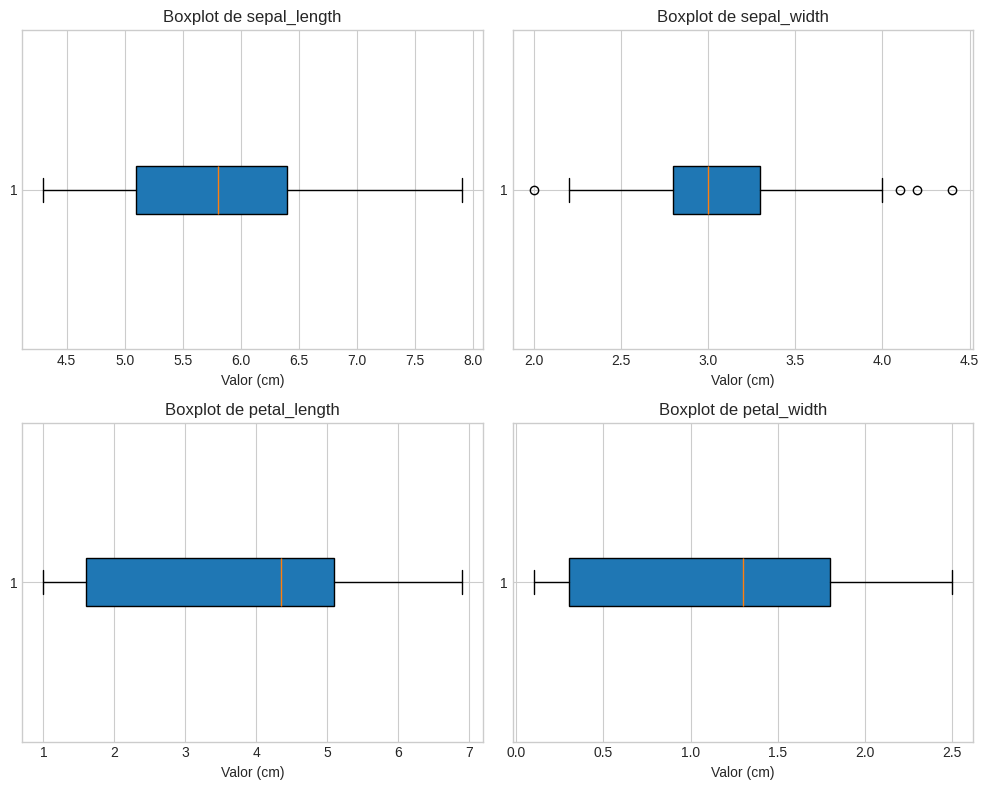

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('iris.csv')

# Obter as colunas numéricas para o boxplot
numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Criar um boxplot para cada variável
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Achatar o array de eixos para facilitar a iteração
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].boxplot(df[col], vert=False, patch_artist=True)
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xlabel('Valor (cm)')

plt.tight_layout()
plt.show()

6 - Encontre os outliers nos dados das bases Iris e BostonHouse.

In [ ]:
import pandas as pd

# Carregar o arquivo
iris_df = pd.read_csv('iris.csv')

print("--- Outliers em iris.csv ---")

# Variáveis numéricas a serem analisadas
numeric_cols_iris = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for col in numeric_cols_iris:
    Q1 = iris_df[col].quantile(0.25)
    Q3 = iris_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = iris_df[(iris_df[col] < lower_bound) | (iris_df[col] > upper_bound)]

    if not outliers.empty:
        print(f"\nVariável: {col}")
        print(outliers)
    else:
        print(f"\nVariável: {col} - Nenhum outlier encontrado.")

--- Outliers em iris.csv ---

Variável: sepal_length - Nenhum outlier encontrado.

Variável: sepal_width
    sepal_length  sepal_width  petal_length  petal_width     species
15           5.7          4.4           1.5          0.4      setosa
32           5.2          4.1           1.5          0.1      setosa
33           5.5          4.2           1.4          0.2      setosa
60           5.0          2.0           3.5          1.0  versicolor

Variável: petal_length - Nenhum outlier encontrado.

Variável: petal_width - Nenhum outlier encontrado.


In [ ]:
import pandas as pd

# Carregar o arquivo, tratando a primeira coluna como índice se necessário
try:
    boston_df = pd.read_csv('BostonHousing.csv')
except FileNotFoundError:
    print("Arquivo BostonHousing.csv não encontrado. Certifique-se de que ele está no mesmo diretório.")
    exit()

print("\n--- Outliers em BostonHousing.csv ---")

# Variáveis numéricas a serem analisadas
# 'chas' é uma variável categórica (0 ou 1), então a removemos.
# 'medv' (valor da mediana) pode ser interessante para análise, mas vamos focar nas características do imóvel.
numeric_cols_boston = [
    'crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat'
]

for col in numeric_cols_boston:
    Q1 = boston_df[col].quantile(0.25)
    Q3 = boston_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = boston_df[(boston_df[col] < lower_bound) | (boston_df[col] > upper_bound)]

    if not outliers.empty:
        print(f"\nVariável: {col}")
        print(f"Total de outliers: {len(outliers)}")
        print("Amostra dos outliers:")
        print(outliers.head())  # Exibe apenas os primeiros 5 para não sobrecarregar
    else:
        print(f"\nVariável: {col} - Nenhum outlier encontrado.")


--- Outliers em BostonHousing.csv ---

Variável: crim
Total de outliers: 66
Amostra dos outliers:
        crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
367  13.5222  0.0   18.1     0  0.631  3.863  100.0  1.5106   24  666   
371   9.2323  0.0   18.1     0  0.631  6.216  100.0  1.1691   24  666   
373  11.1081  0.0   18.1     0  0.668  4.906  100.0  1.1742   24  666   
374  18.4982  0.0   18.1     0  0.668  4.138  100.0  1.1370   24  666   
375  19.6091  0.0   18.1     0  0.671  7.313   97.9  1.3163   24  666   

     ptratio       b  lstat  medv  
367     20.2  131.42  13.33  23.1  
371     20.2  366.15   9.53  50.0  
373     20.2  396.90  34.77  13.8  
374     20.2  396.90  37.97  13.8  
375     20.2  396.90  13.44  15.0  

Variável: zn
Total de outliers: 68
Amostra dos outliers:
       crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
39  0.02763  75.0   2.95     0  0.428  6.595  21.8  5.4011    3  252     18.3   
40  0.03359  75.0   2.95  